# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [73]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [74]:
# loading data into a pandas dataframe
data = pd.read_csv("Customer_Personality_Segmentation.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:** Most variables are integer objects, Income is a float object. The categorical variables are objects, except for ID.

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [76]:
#use describe method from pandas to get a statistical summary of the data
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##### **Observations:** The average household income is around $52,247.25

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [77]:
#count number of null values
data['Income'] = data['Income'].fillna(0)
print(data.isnull().sum())

#Convert Dt_Customer datetime object
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


##### **Observations:** Income had some null values, so using the fillna function I replaced all the NaN entries with 0. Dt_Customer was in string format, so converted to datetime object

#### **Question 4**: Are there any duplicates in the data?

In [78]:
# Indentify all the duplicated entries
duplicates = data[data.duplicated()]
duplicates

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


##### **Observations:** No there are no duplicates in the data 

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

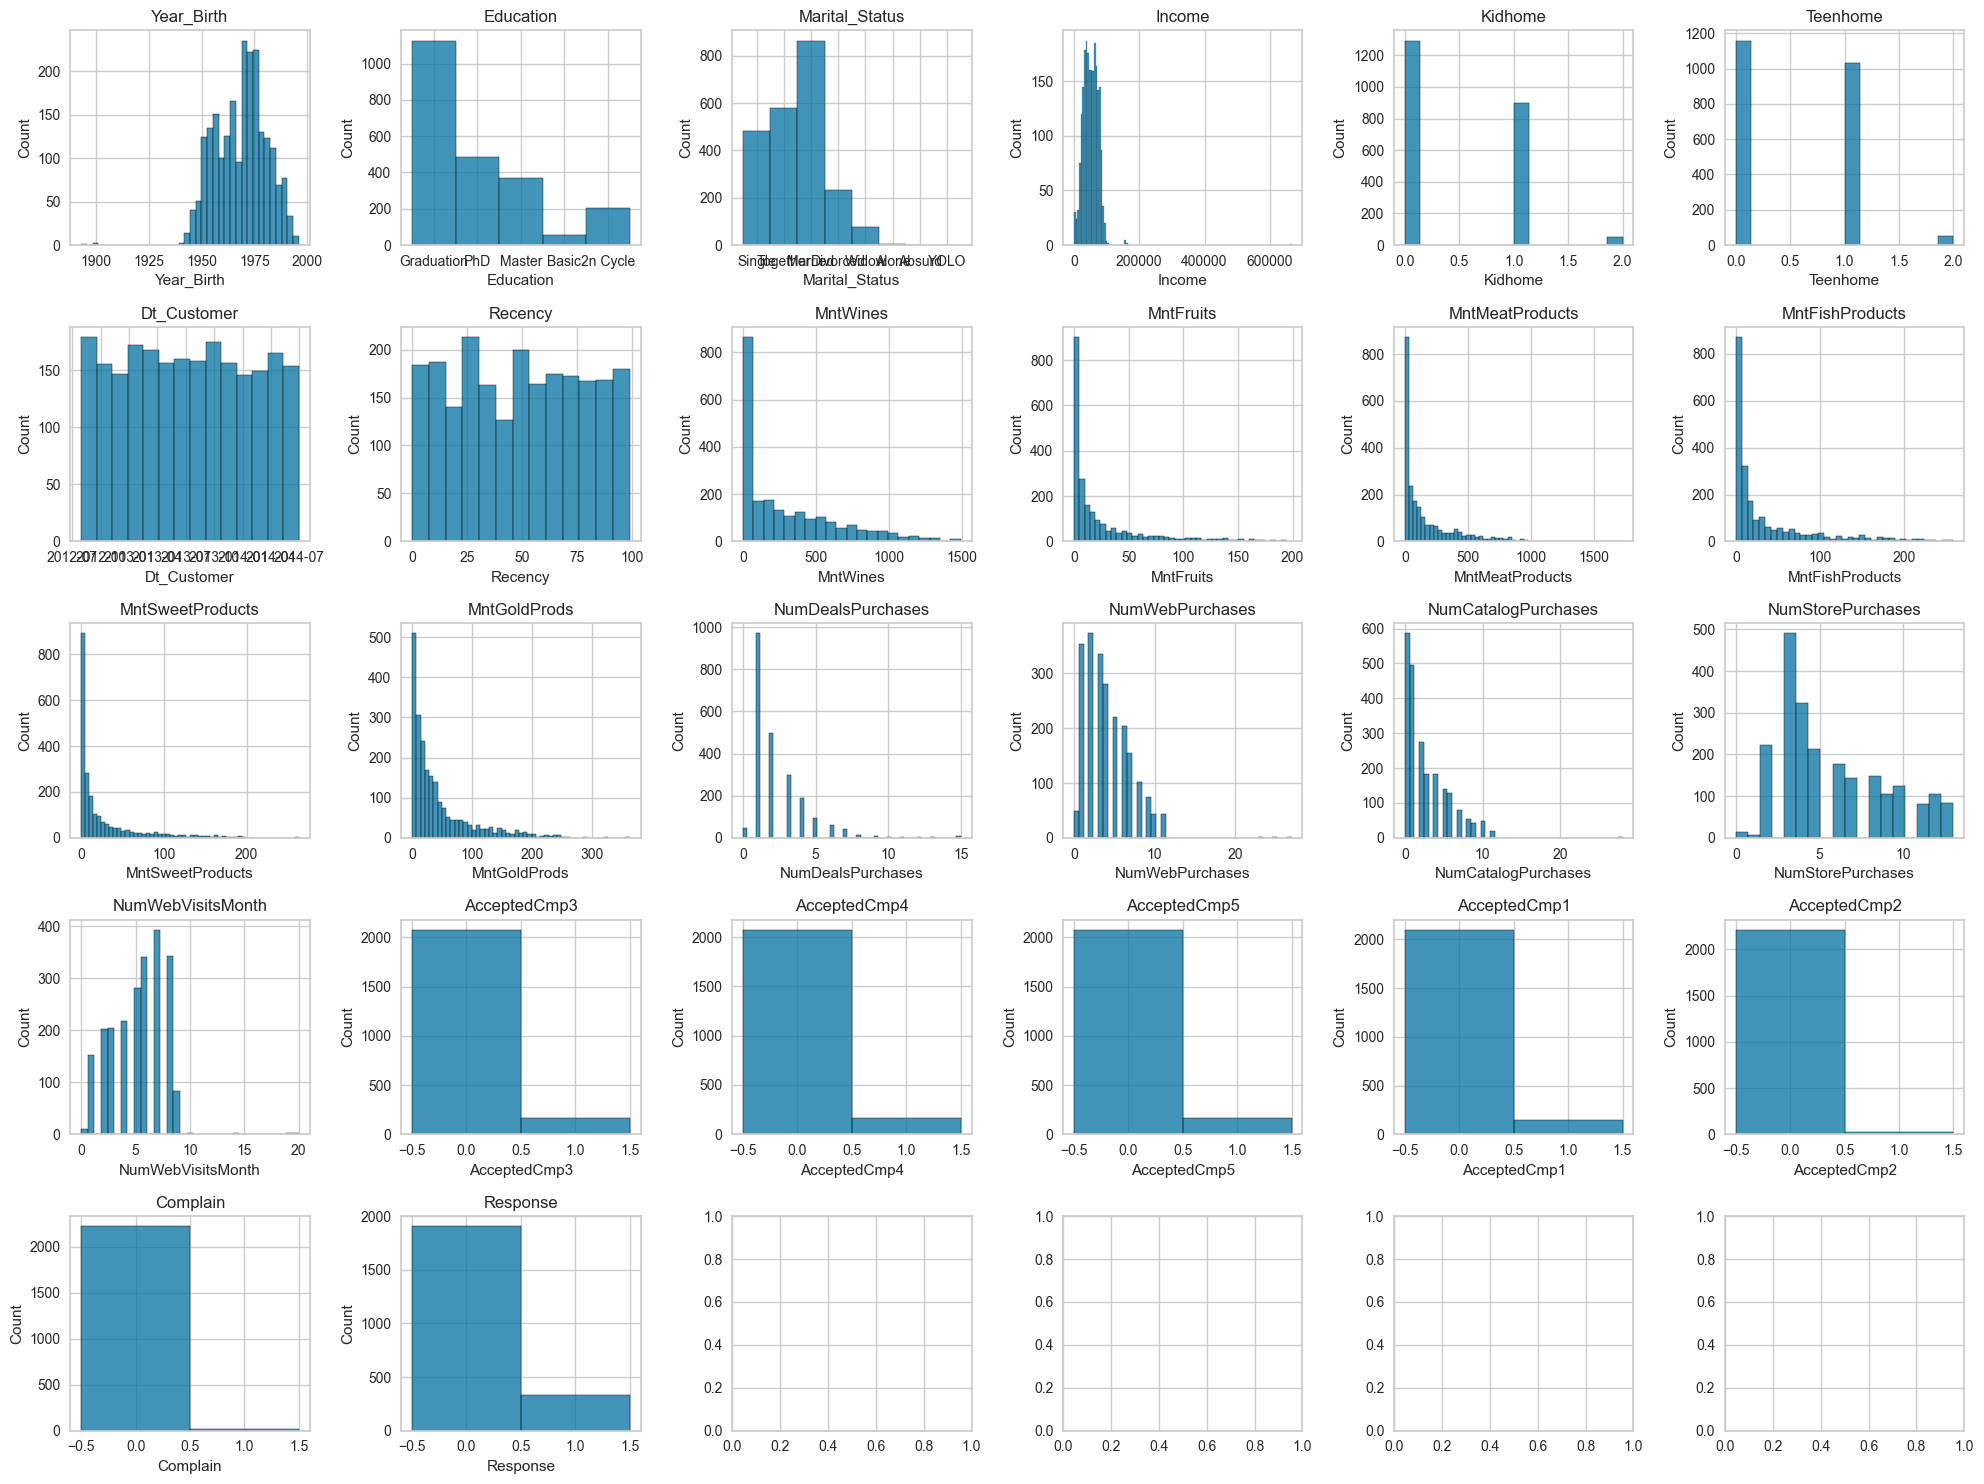

In [79]:
# Histogram of each of the variables

#Get all columns, skip ID and Z scores
variables = data.columns[1:]
variables = list(variables)
del variables[-3:-1]

#grid of plots based on how many variables there are
fig, axes = plt.subplots(len(variables)//6+1, 6, figsize=(20, 15))

#Loop through each column and plot histogram 
for i, variable in enumerate(variables):
    ax = axes.flat[i]
    # Check if variable is boolean
    if len(data[variable].unique()) == 2:
        sns.histplot(data=data[variable], discrete=True, ax=ax)
    else:
        sns.histplot(data=data[variable], ax=ax)
    ax.set_title(variable)
plt.tight_layout()
plt.show()


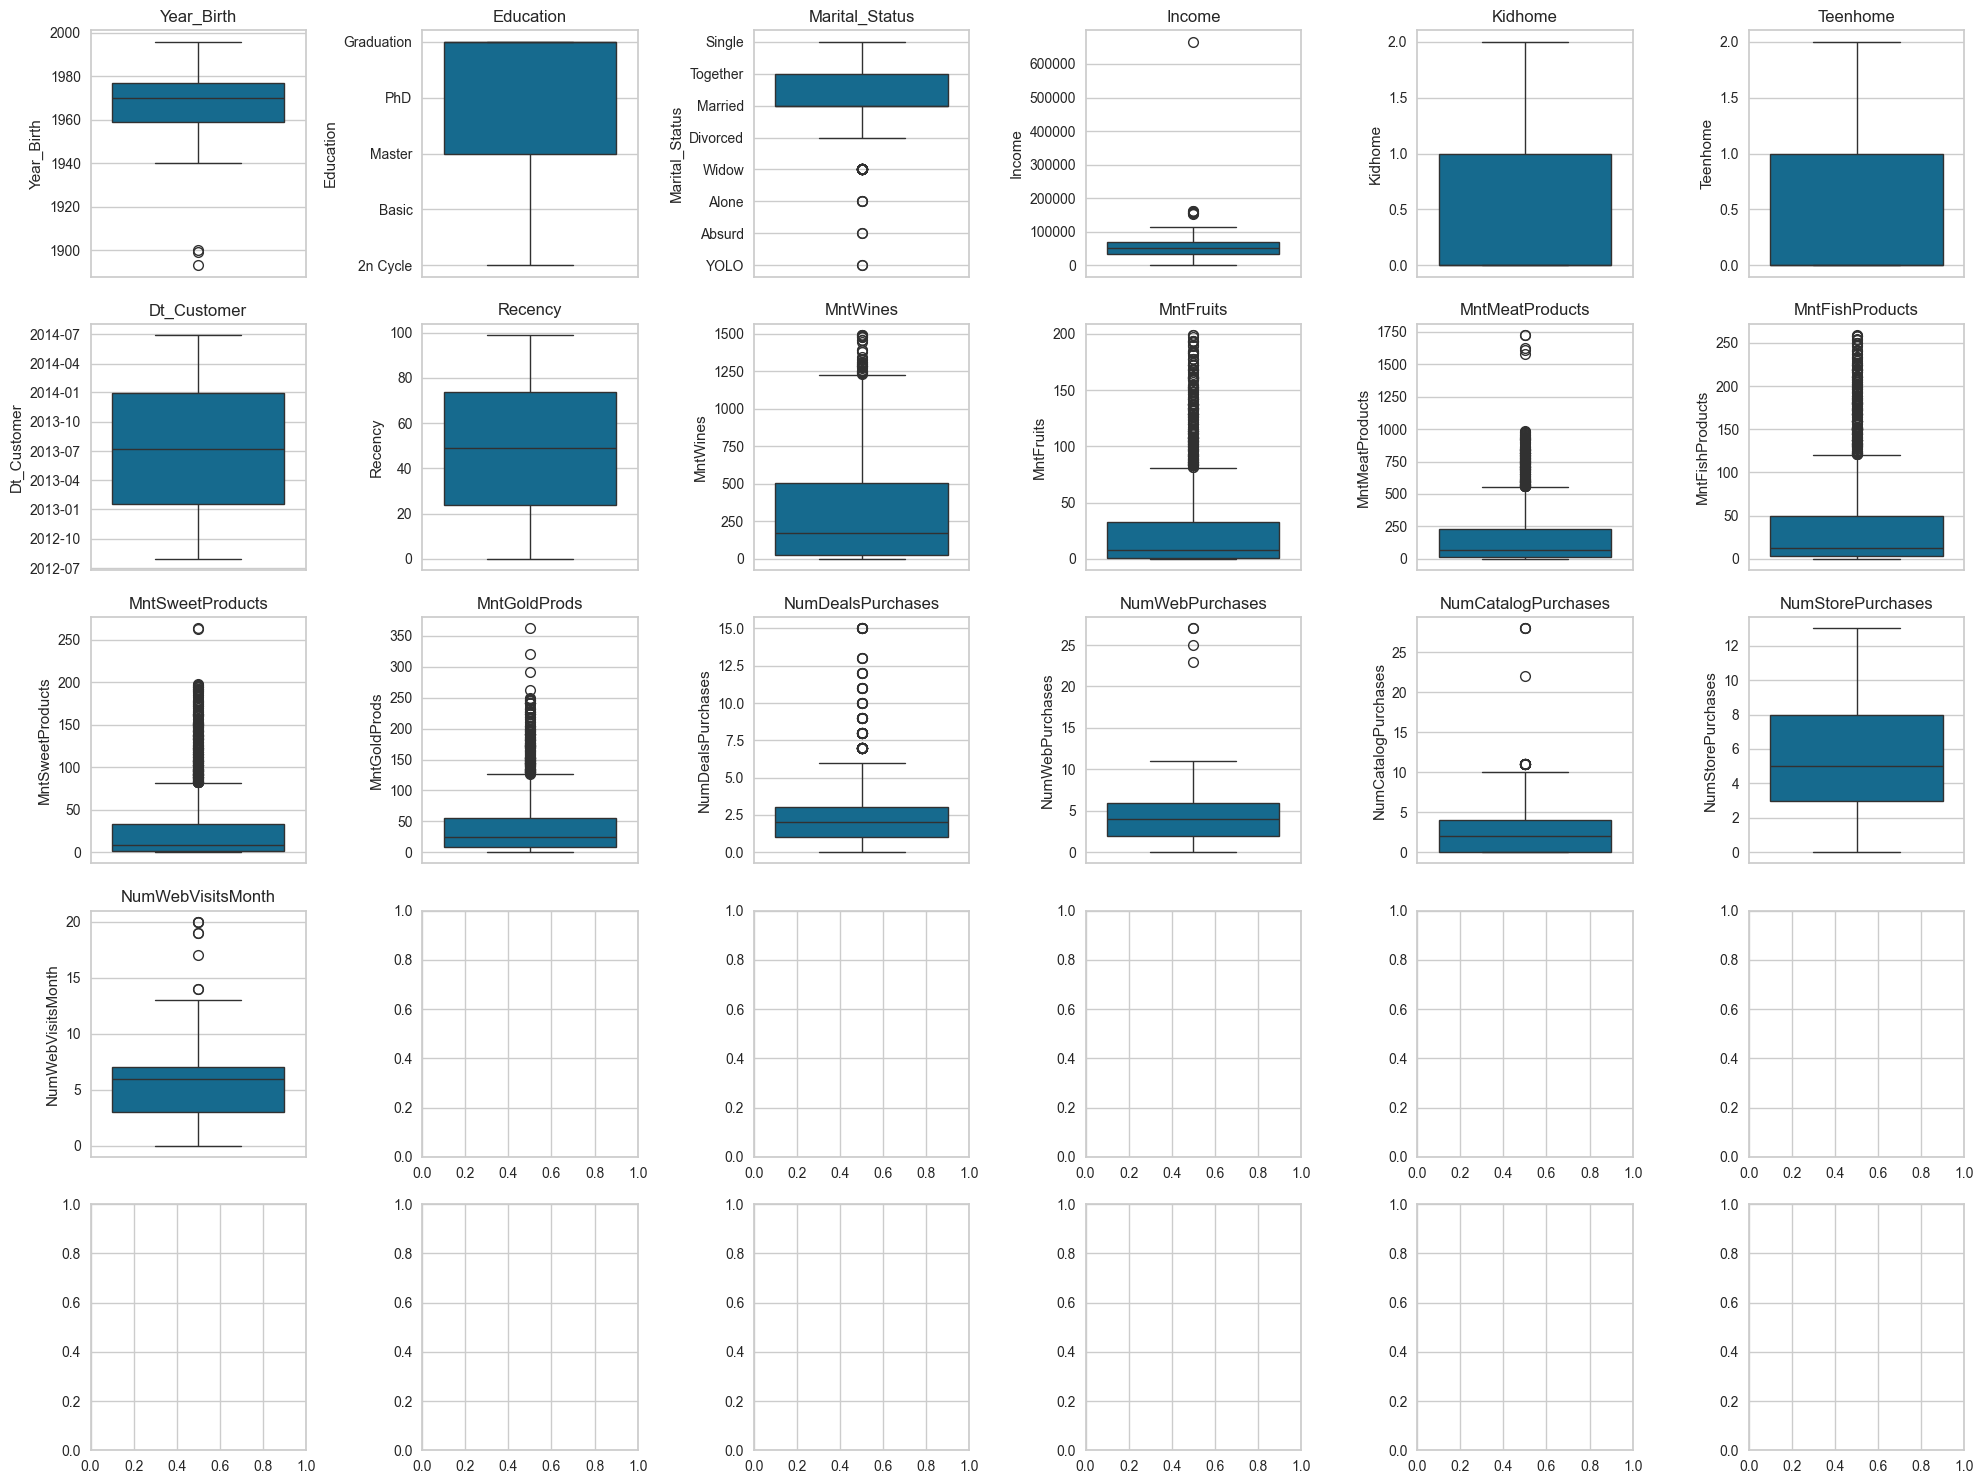

In [80]:
#grid of plots based on how many variables there are
fig, axes = plt.subplots(len(variables)//6+1, 6, figsize=(20, 15))

#Loop through each column and plot boxplot 
for i, variable in enumerate(variables):
    ax = axes.flat[i]
    # Check if variable is boolean
    if len(data[variable].unique()) != 2:
        sns.boxplot(data=data[variable], ax=ax)
        ax.set_title(variable)
plt.tight_layout()
plt.show()

##### **Observations:** Year of birth is loosely normally distributed, education is left skewed, marital_status is left skewed, income is normally distributed with outliers. The majority of people with kids are 0 with a good number with 1 kid and a similar pattern with teenagers. Dt_Customer and recency are relatively uniform. All the amount spent on the products are left skewed with many outliers. The number of purchases with deals and web purchases as well as catalog purchases all are left skewed. Store purchases is still left skewed but less so than the other purchase variables. Web visits per month has many people visiting around 6, 7 times a month and is distributed relatively normally around those values and a few outliers to the right. 

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

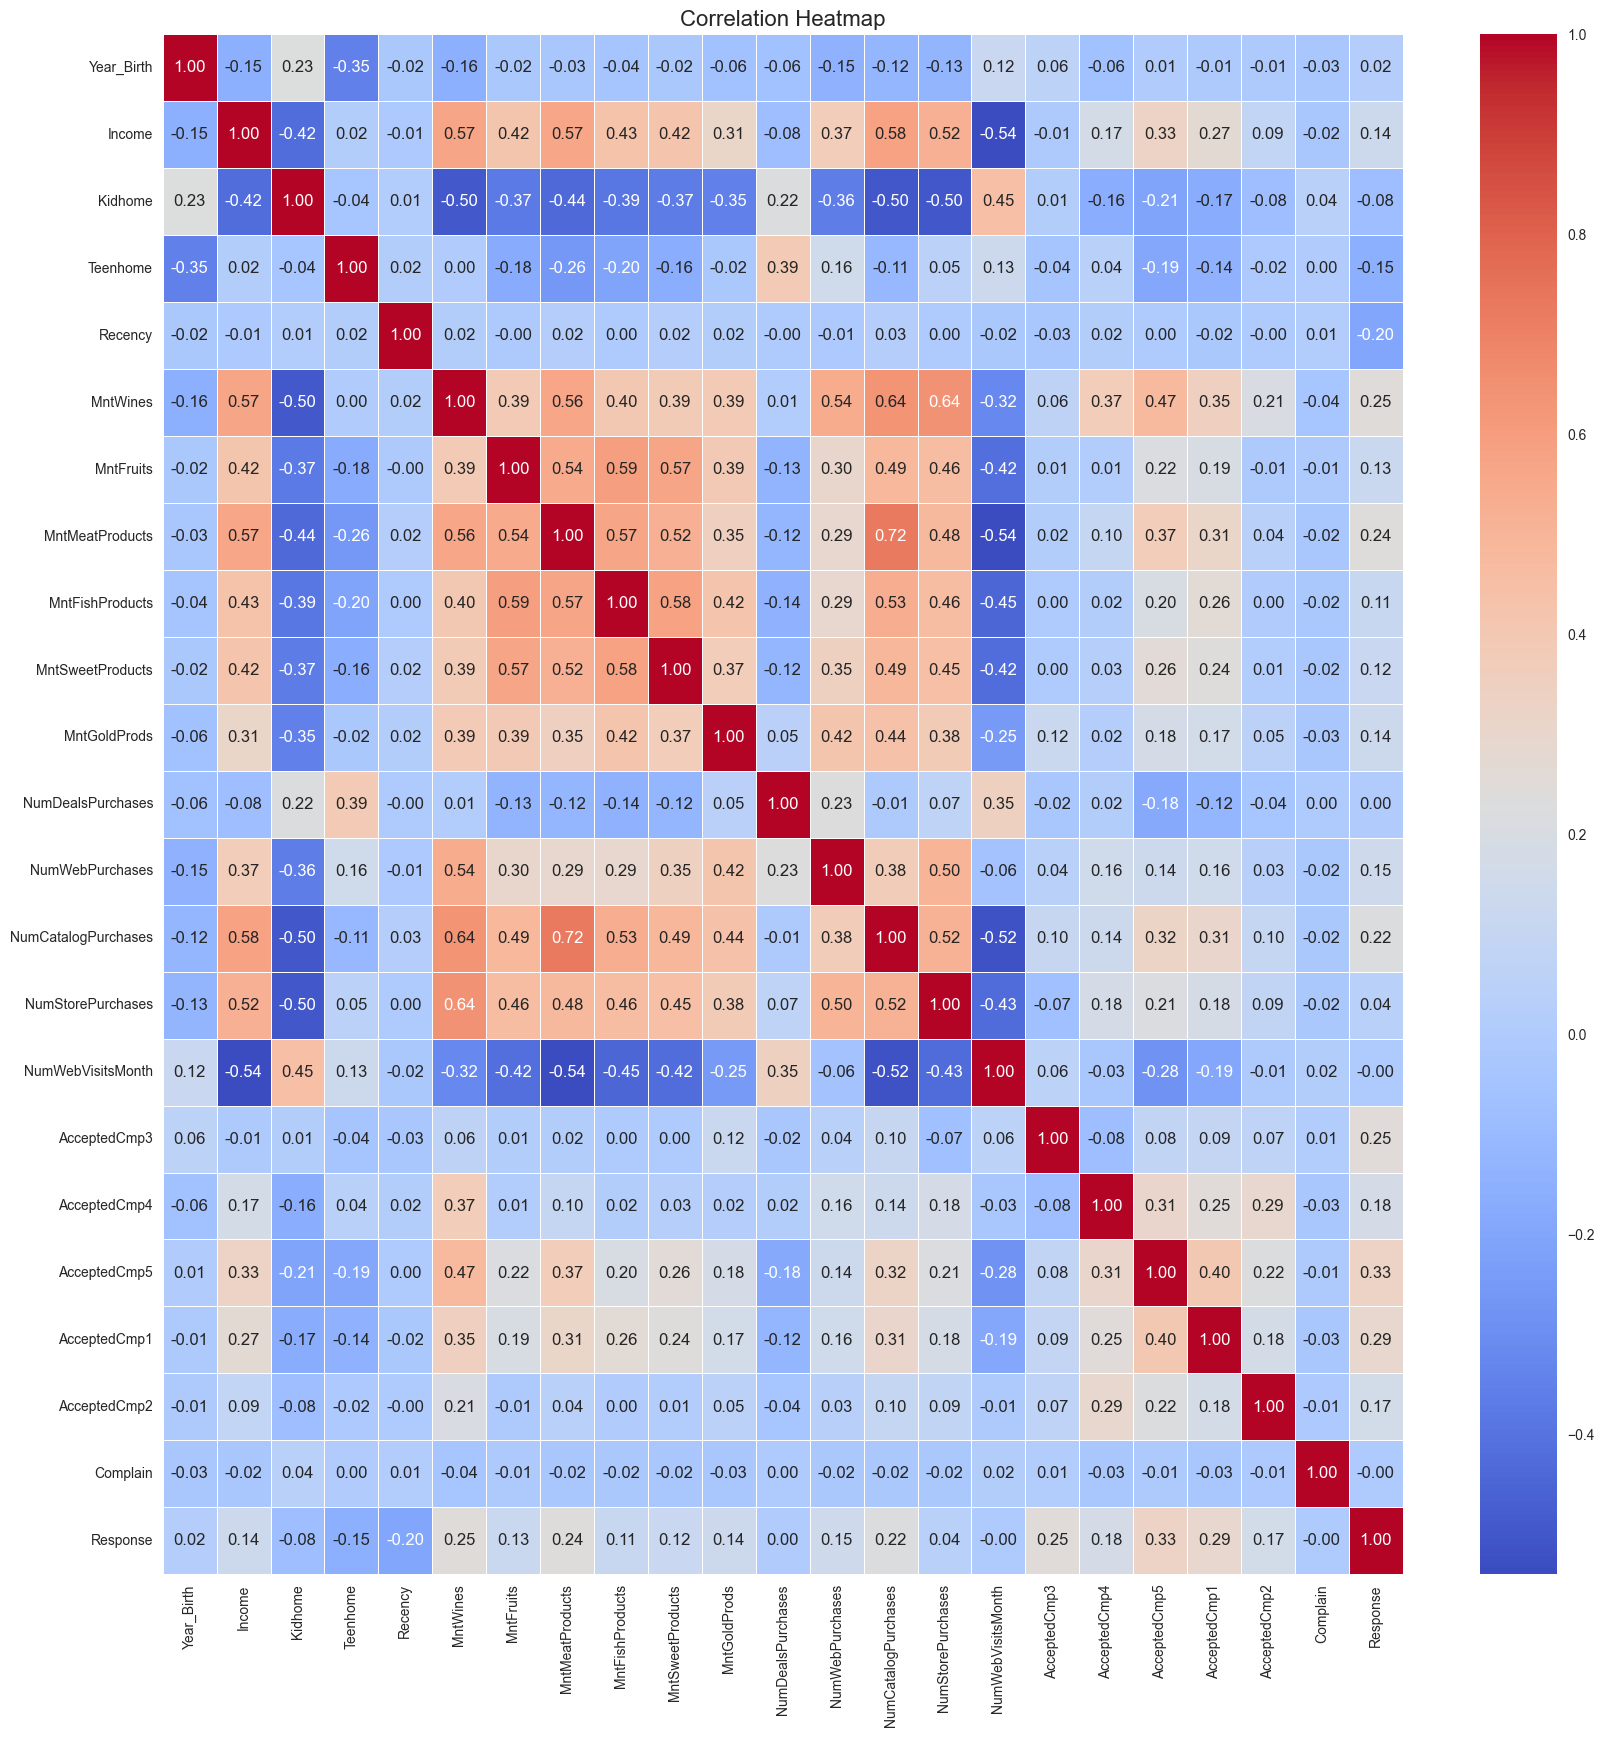

In [81]:
plt.figure(figsize=(20,20))

#Drop irrelevant columns
num_data = data.copy().select_dtypes(include=['int64', 'float64']).drop(columns=["ID", "Z_CostContact", "Z_Revenue"])
corr = num_data.corr()

#Create heatmap to visualize correlations
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

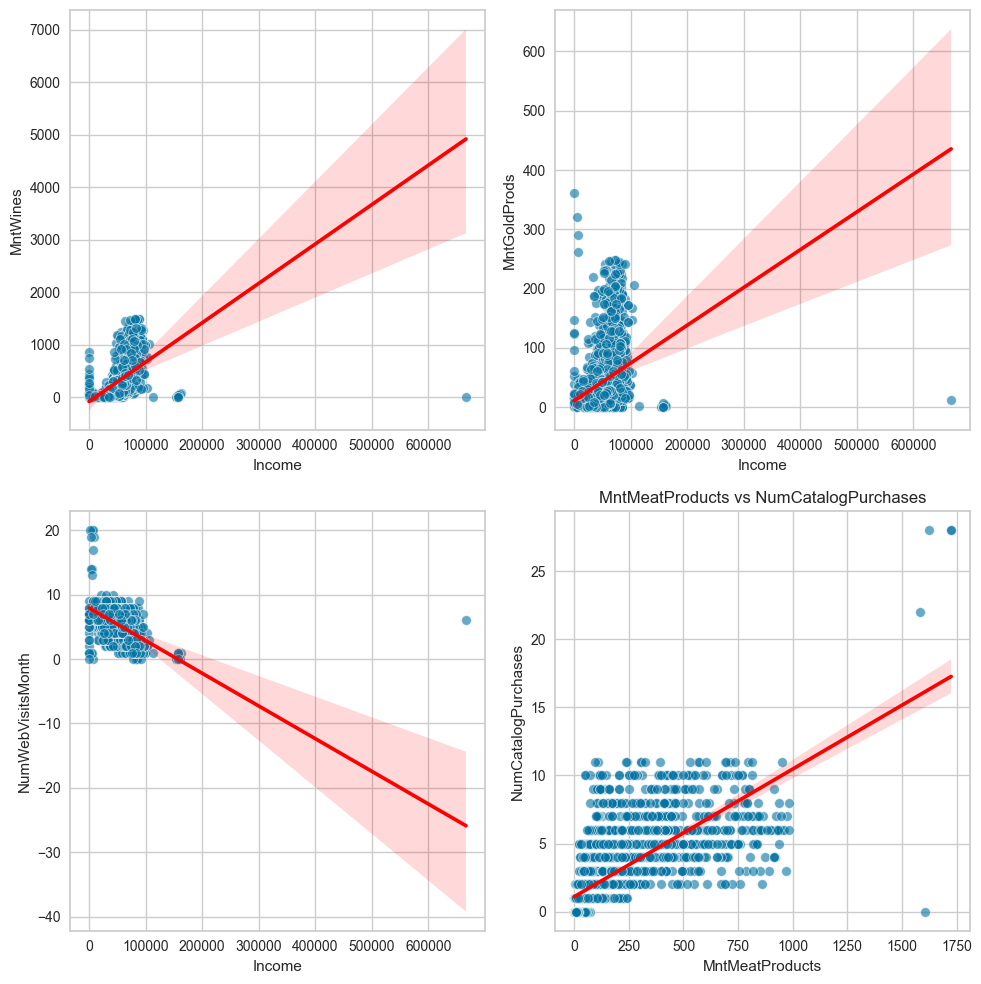

In [82]:
#Plots for income vs spending
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, variables in enumerate([('Income', 'MntWines'), ('Income', 'MntGoldProds'),
                               ('Income', 'NumWebVisitsMonth'), ("MntMeatProducts", "NumCatalogPurchases")]):   
    ax = axes.flat[i]
    sns.scatterplot(x=variables[0], y=variables[1], data=data, alpha=0.6, ax=ax)
    sns.regplot(x=variables[0], y=variables[1], data=data, scatter=False, color="red", ax=ax)
    plt.title(f"{variables[0]} vs {variables[1]}")
plt.tight_layout()
plt.show()




##### **Observations:** There's a strong correlation between income and amount spent in wines (r=0.57) and other products, although some are not as strong as others. Intriguingly the highest correlation between two variables is the number of catalog purchaes and amount spent in meat (r=0.72).  

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

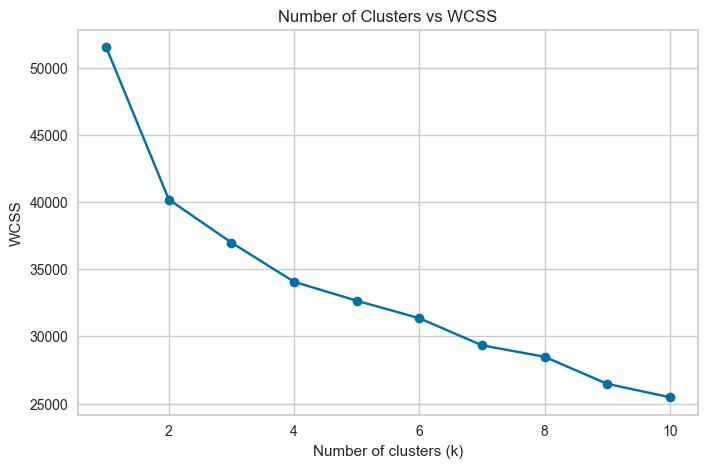

In [83]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(num_data)

#Intialize within within-cluster sum of squares
wcss = []

# Find the wcss for clusters size 1 to 10
K = range(1, 11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

#plot the graph
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Number of Clusters vs WCSS')
plt.show()


##### **Observations:** The most drastic drop in WCSS comes from 1 to 2 and starts leveling off after. It appears that the most optimal number of clusters is 2

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

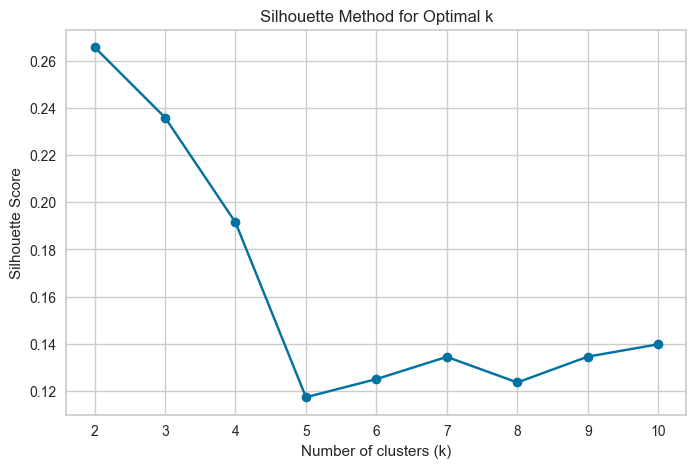

In [85]:
# Intialize silhouette scores array
silhouette_scores = []

# Clusters from 2 to 10
K = range(2, 11)

# Loop through each number of clusters and find silhouette score for each
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Plot graph
plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

##### **Observations:** The silhouette score is the highest at 2 and then progressively gets worse until 5, where it starts getting larger again. This matches my previous conclusion that the optimal number of clusters is 2, as the score is the largest at 2. 

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [86]:
import time

best_k = 2

# Initialize starting time
start_time = time.time()

# Fit data into best number of cluster, 2
final_model = KMeans(n_clusters=best_k, random_state=42)
final_model.fit(data_scaled)

# Initialize ending time
end_time = time.time()
fit_time = end_time - start_time

print(f"Total time to fit model with k={best_k}: {fit_time:.4f} seconds")

Total time to fit model with k=2: 0.0856 seconds


##### **Observations:** It takes the model around 0.1674 seconds to fit the data

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

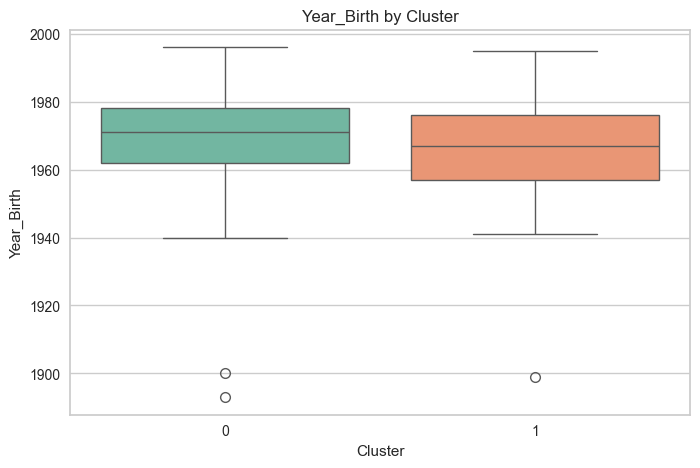

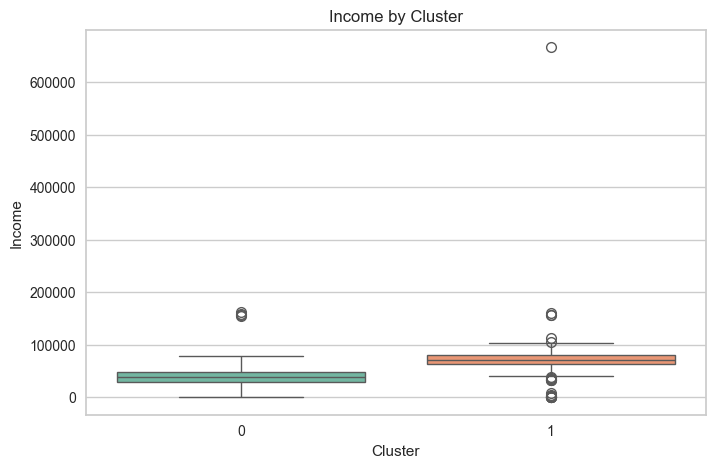

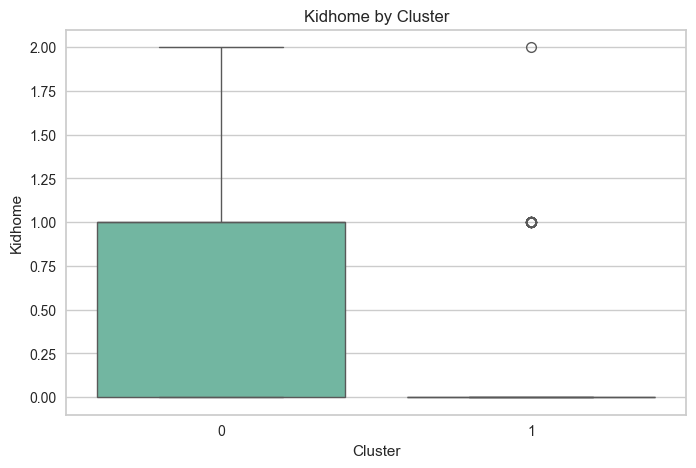

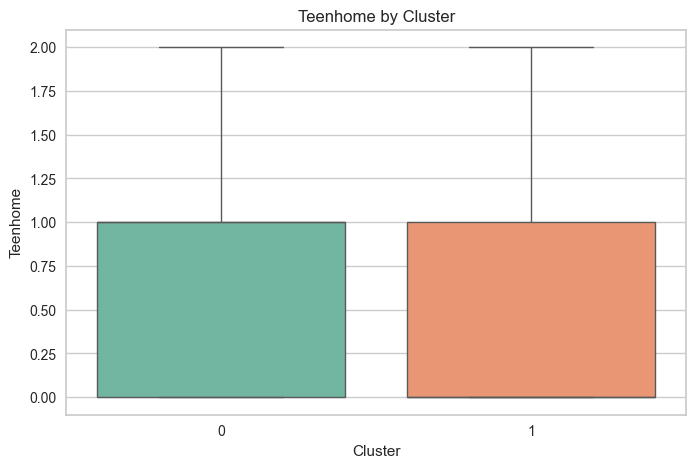

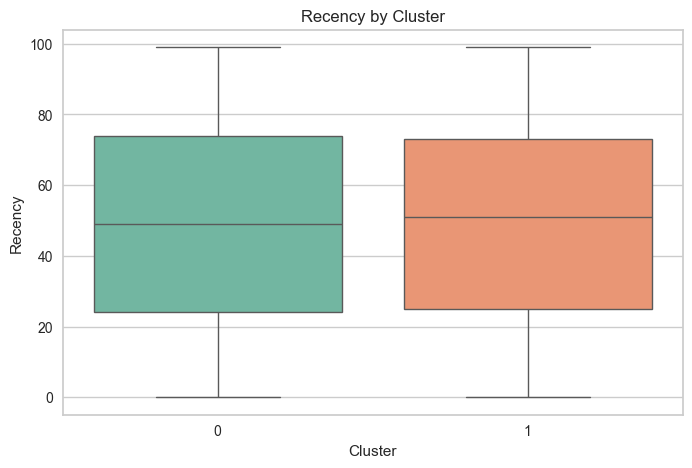

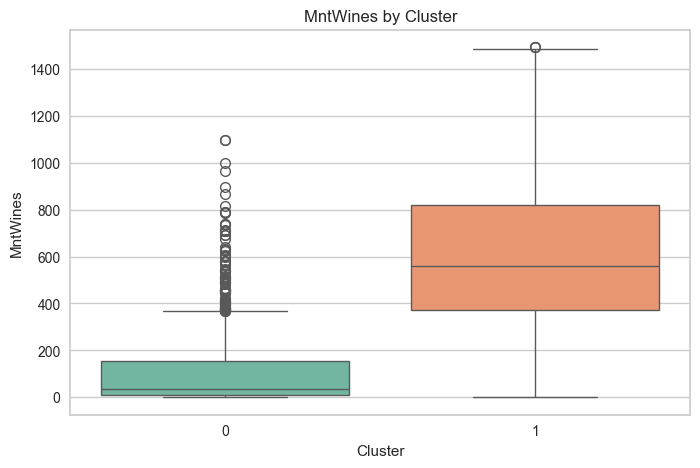

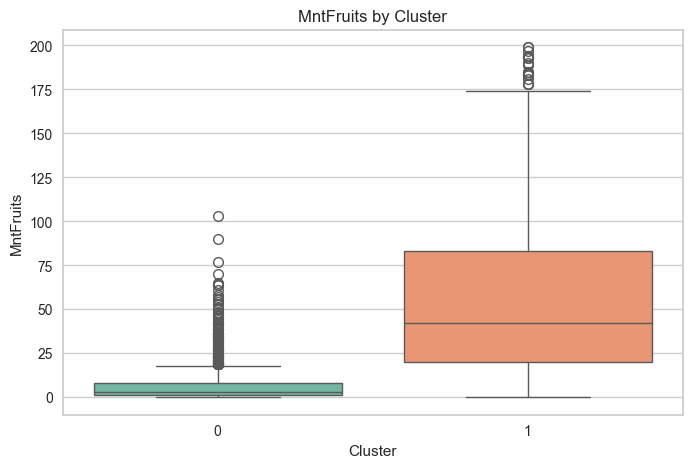

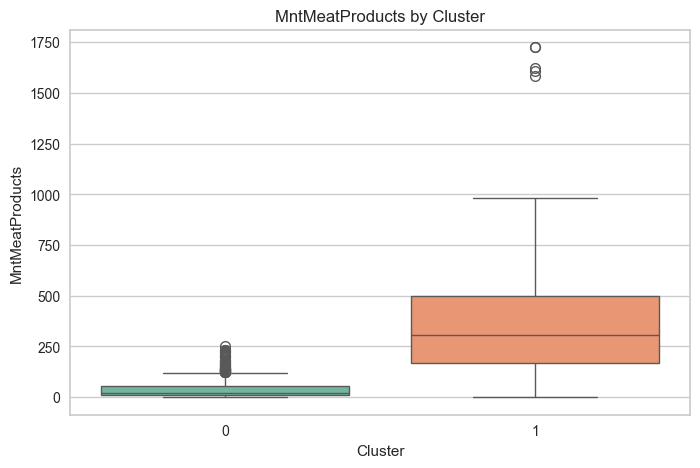

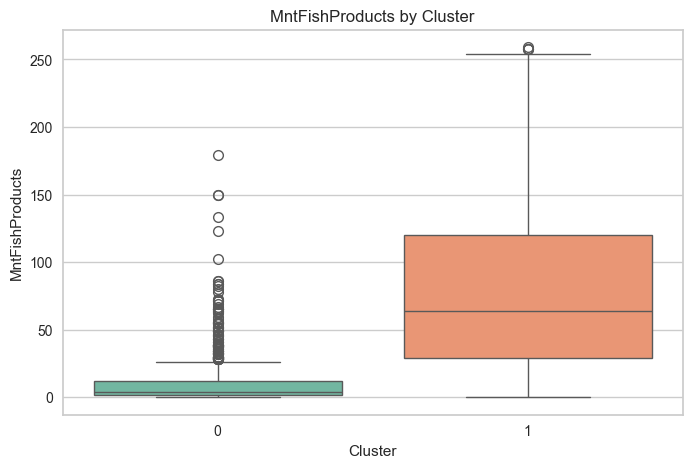

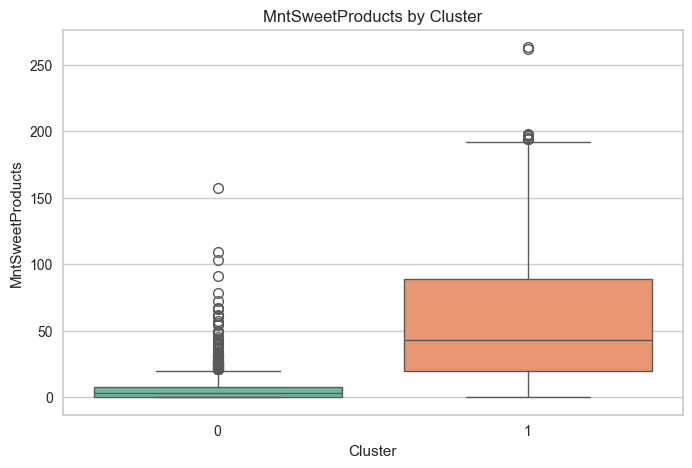

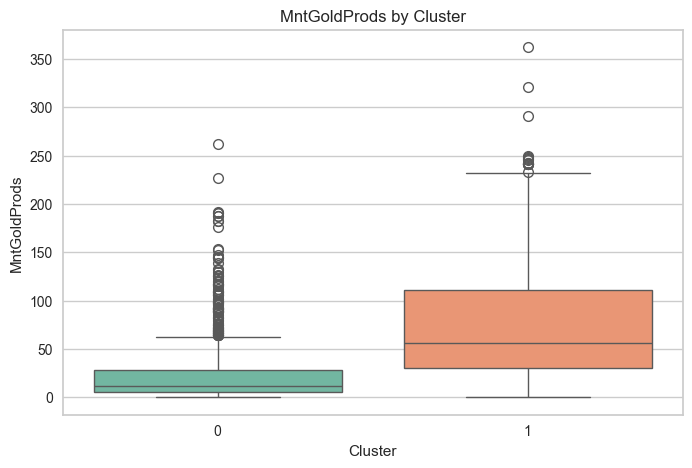

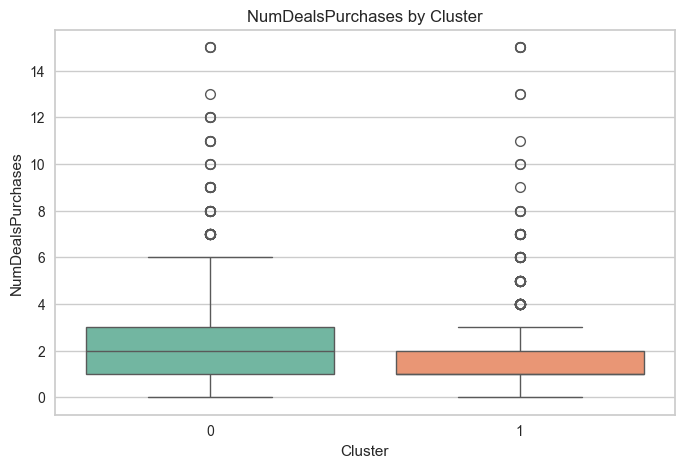

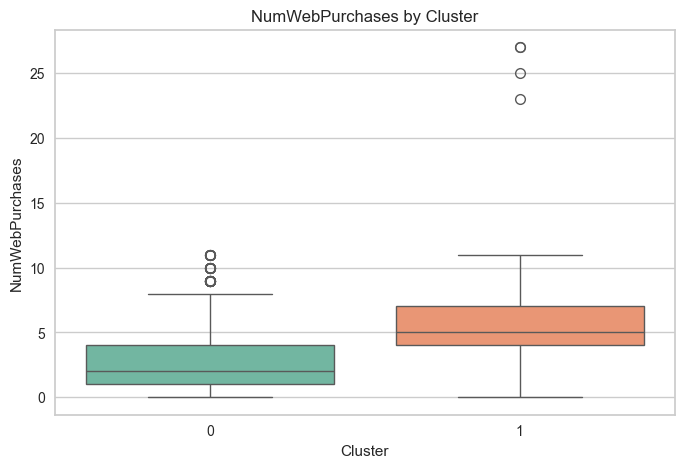

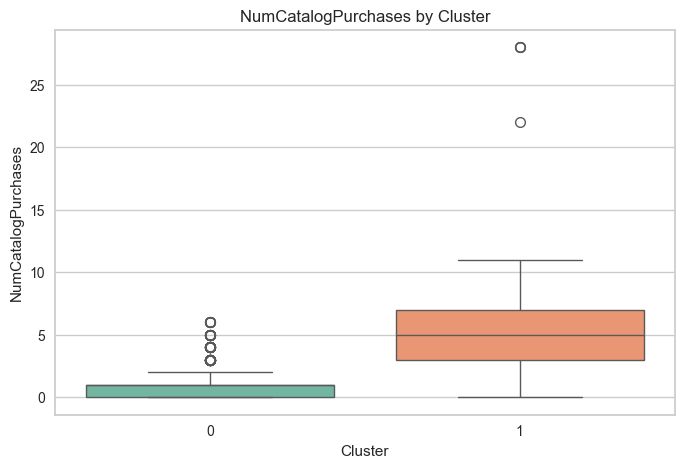

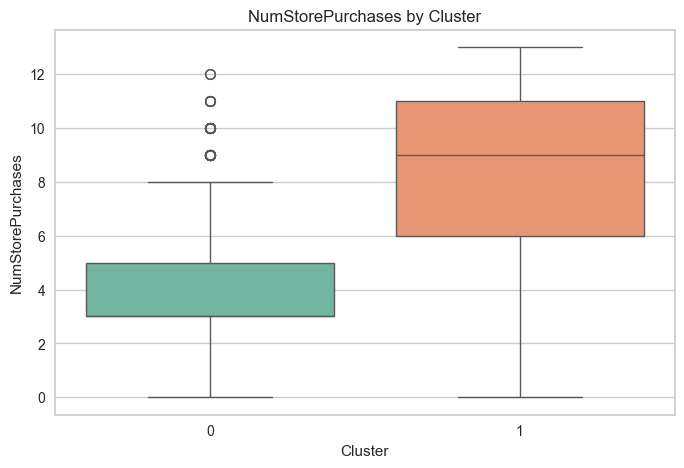

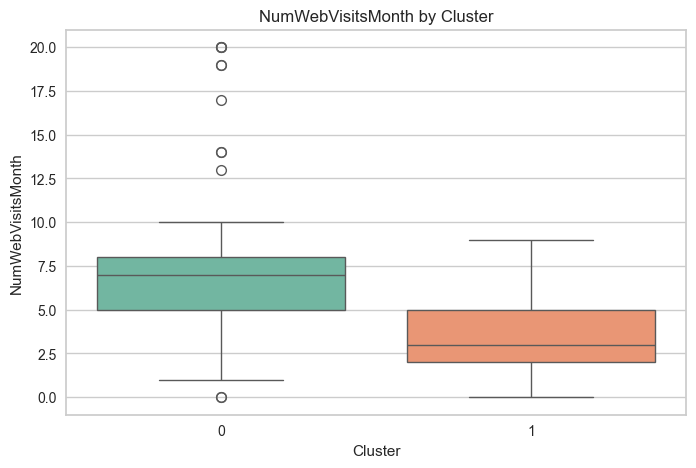

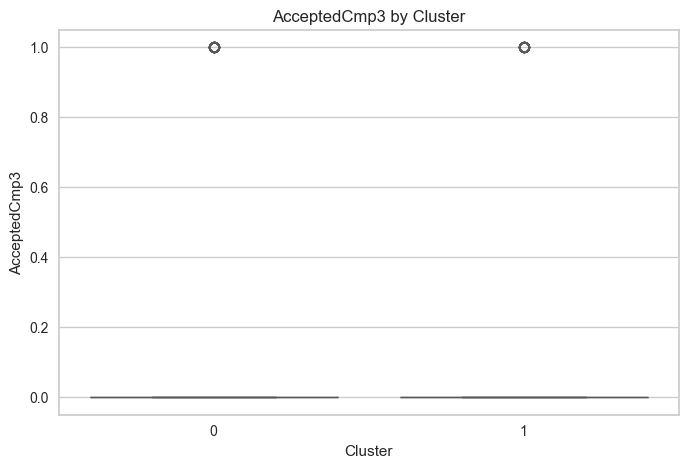

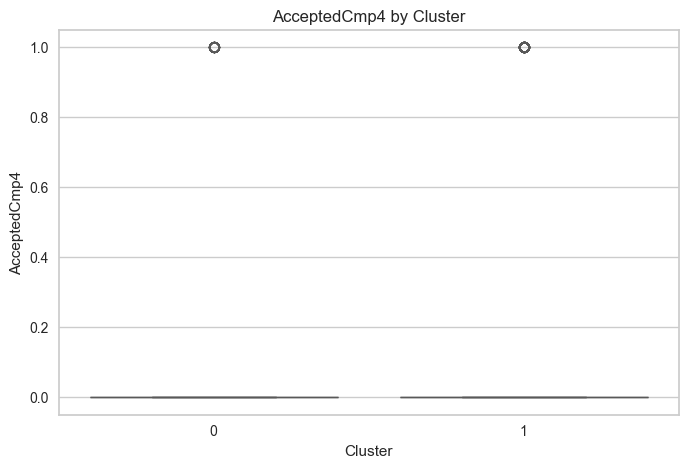

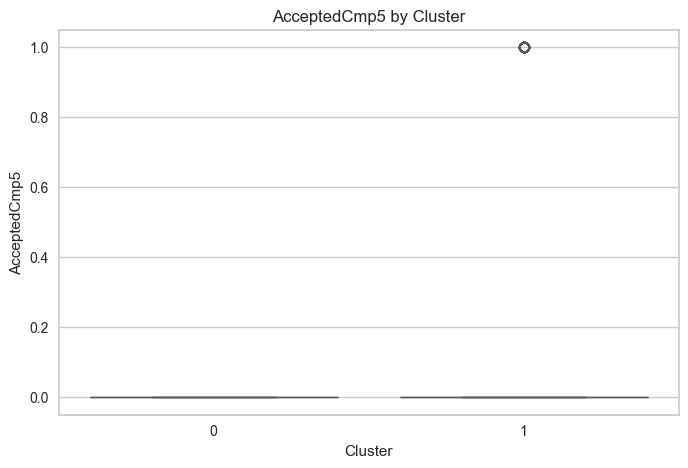

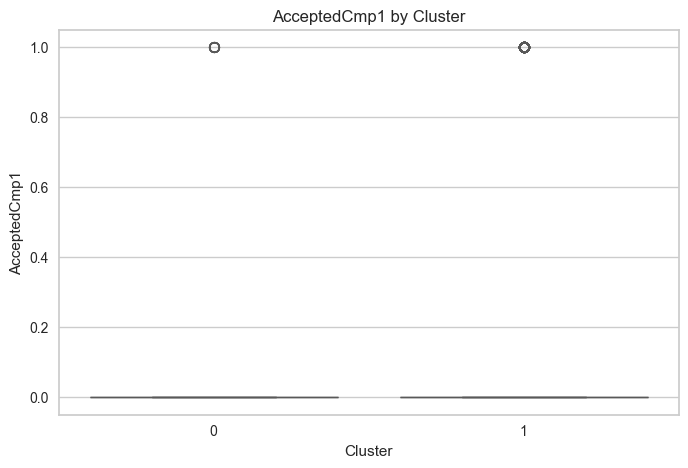

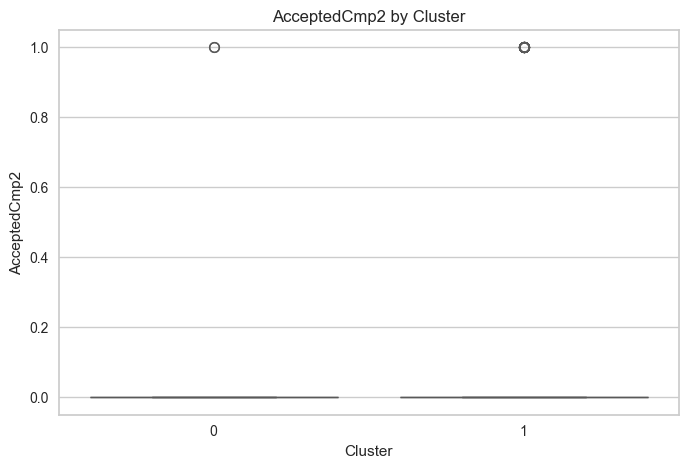

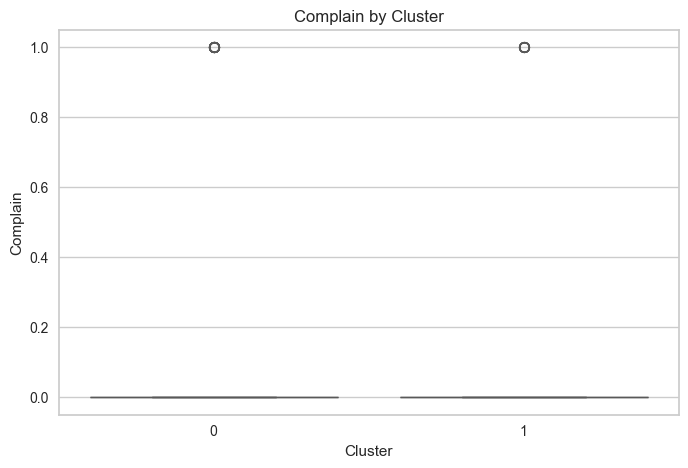

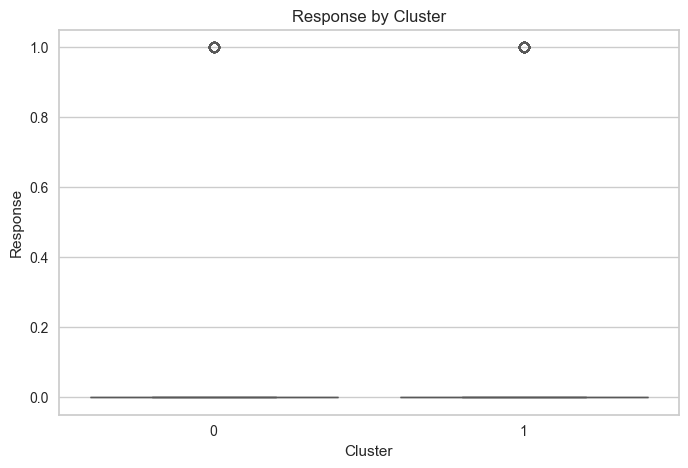

In [89]:
# Create Cluster column
data['Cluster'] = final_model.labels_

# Loop through each numerical data point and plot the boxplot for the clusters
for col in num_data:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Cluster', y=col, data=data, palette='Set2')
    plt.title(f'{col} by Cluster')
    plt.show()

##### **Observations:** Cluster 1 and cluster 2 have similar year demographics, but cluster 1 has a lower median income as opposed to cluster 2. Cluster 1 spends overall significallyt less in all products, but cluster 1 has higher median deal purchases and number of website visits per month.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

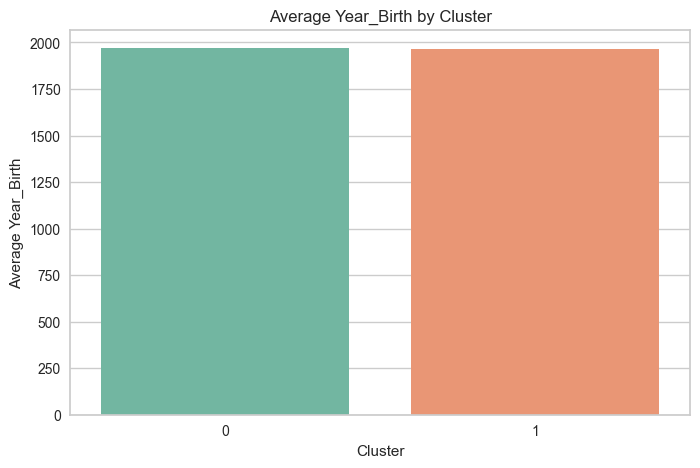

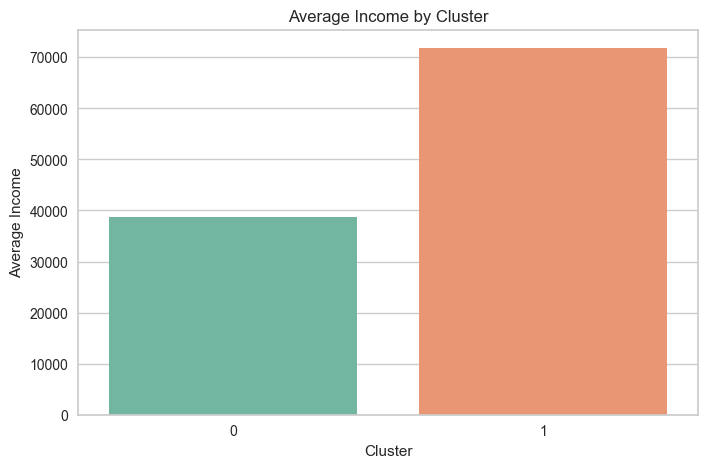

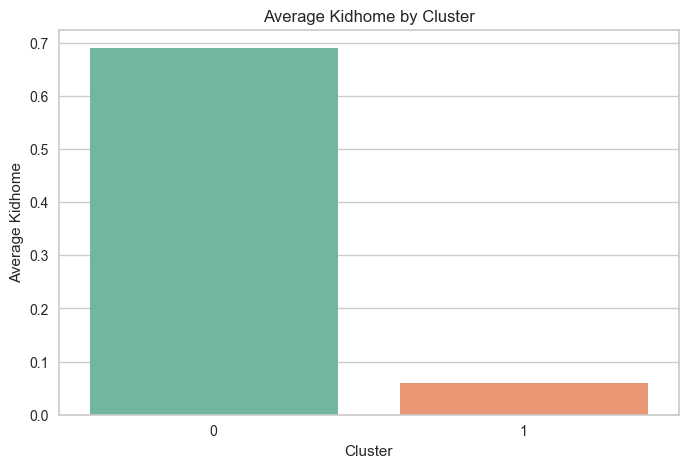

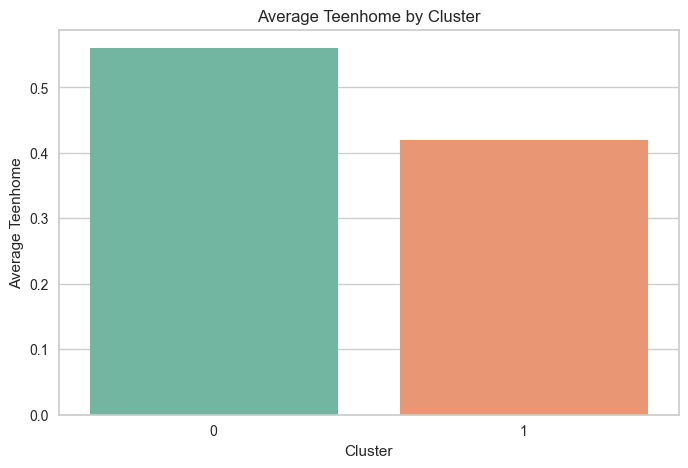

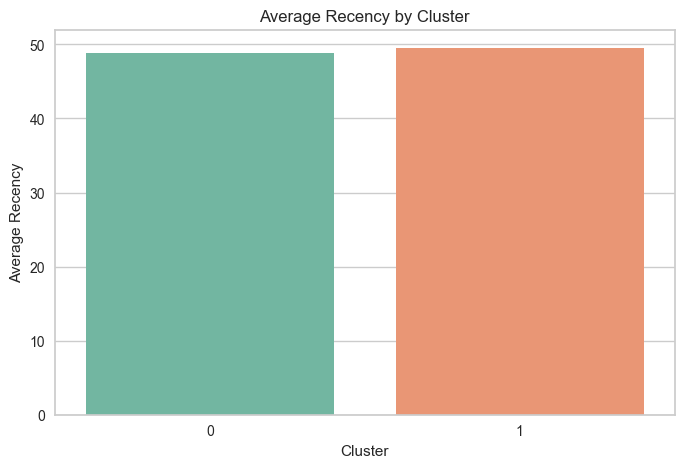

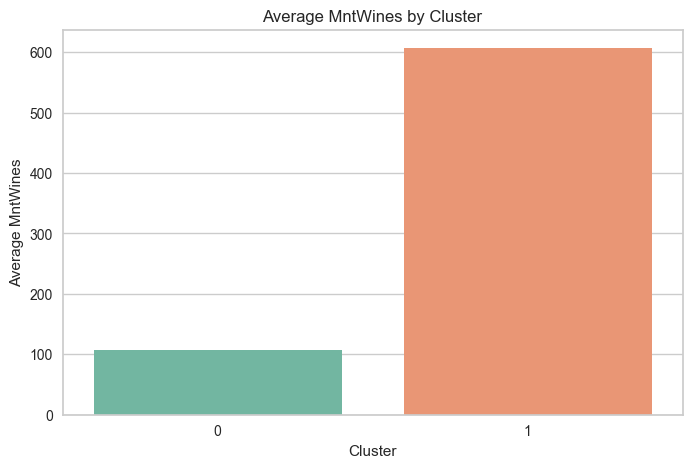

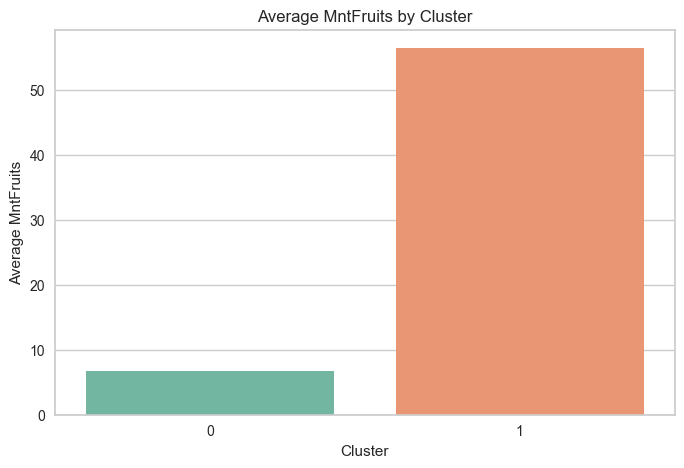

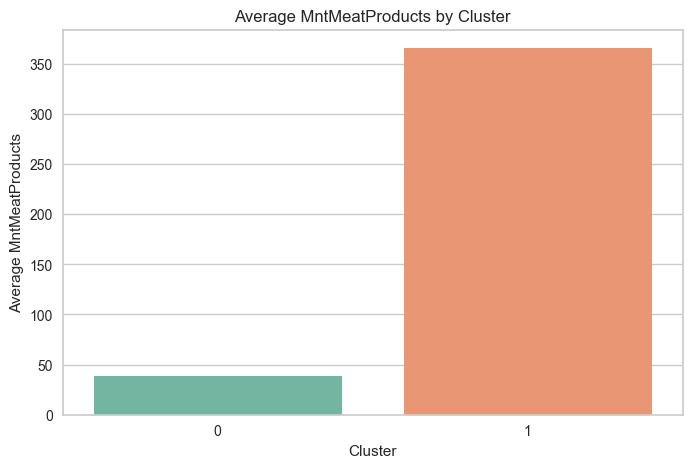

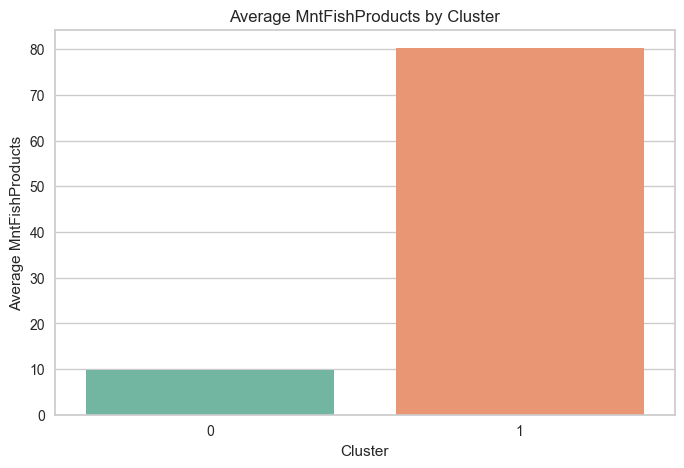

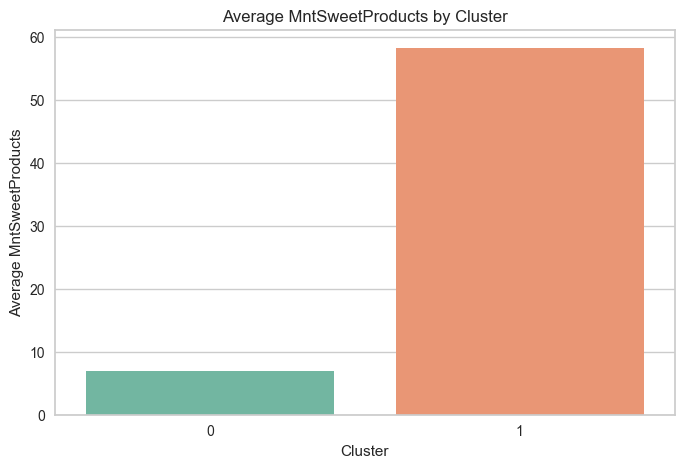

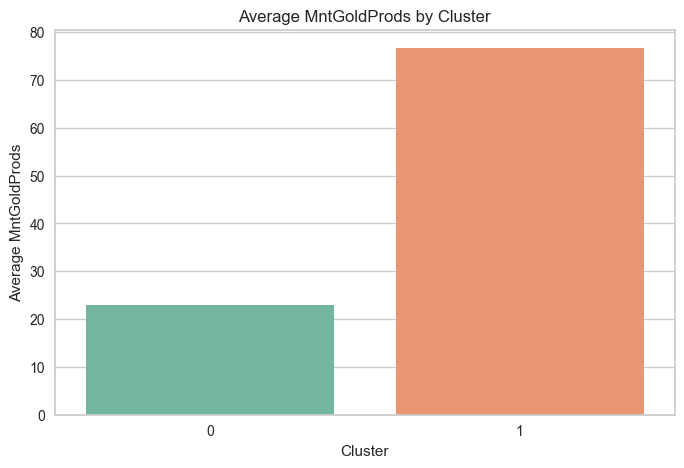

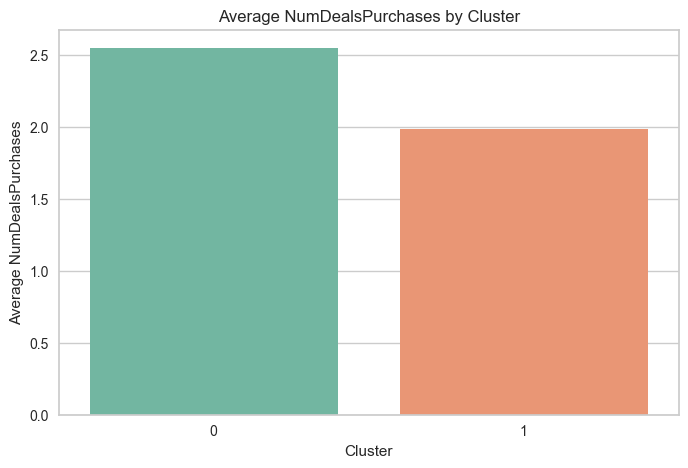

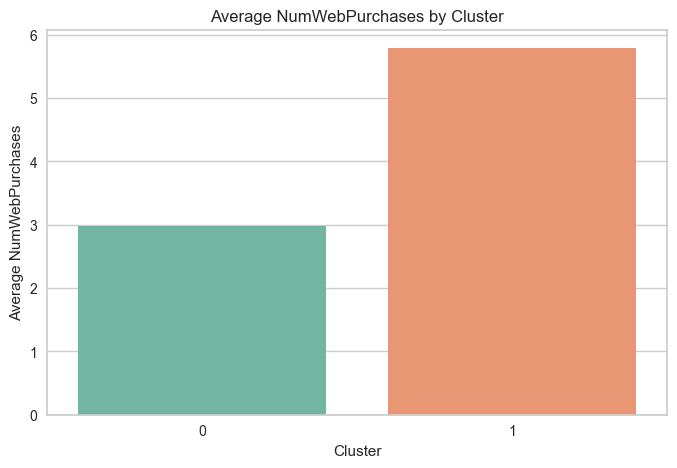

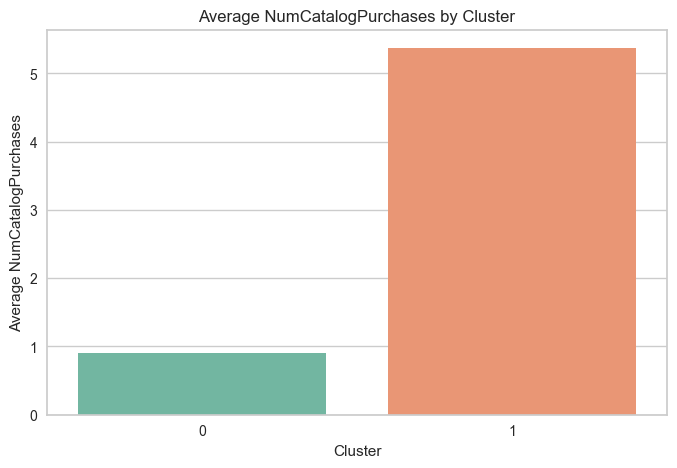

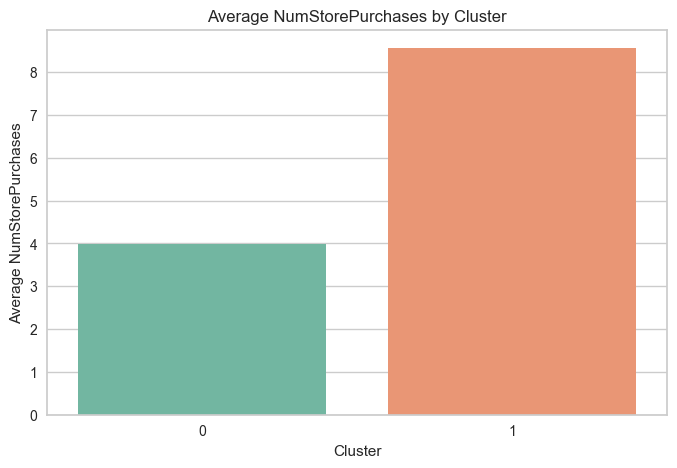

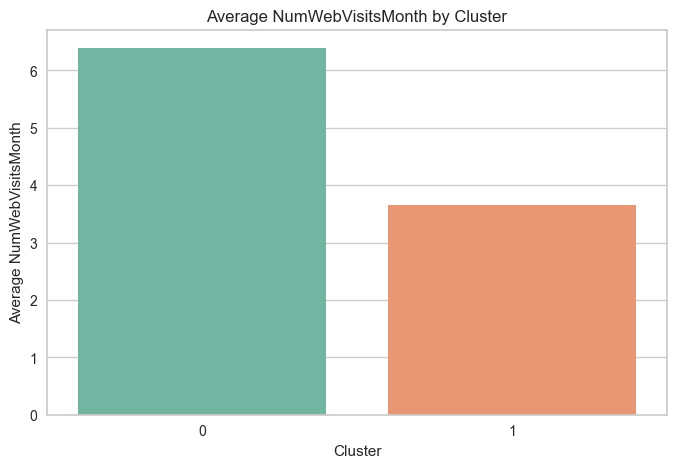

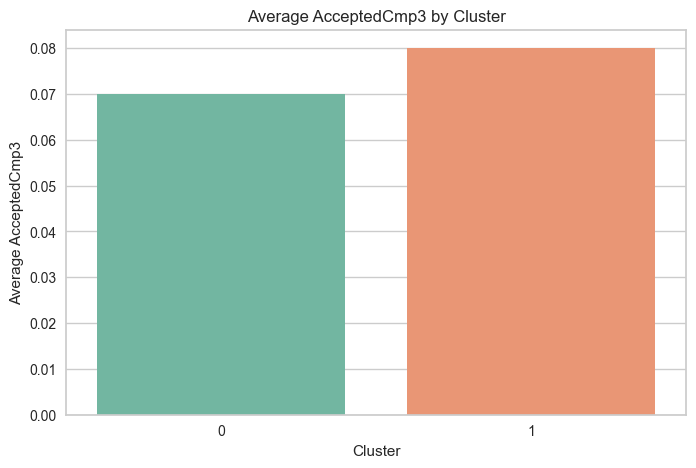

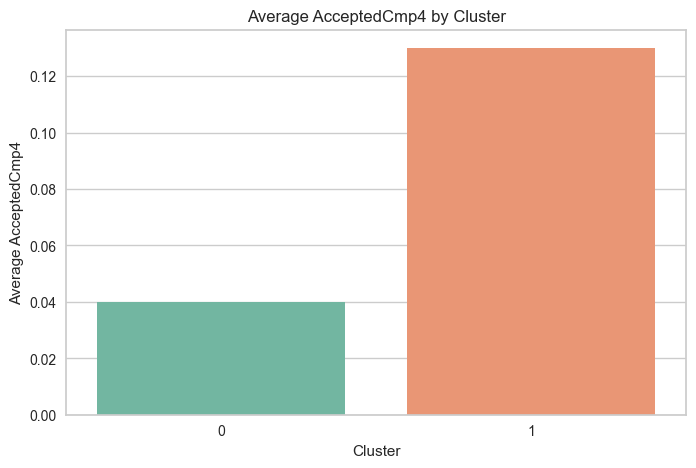

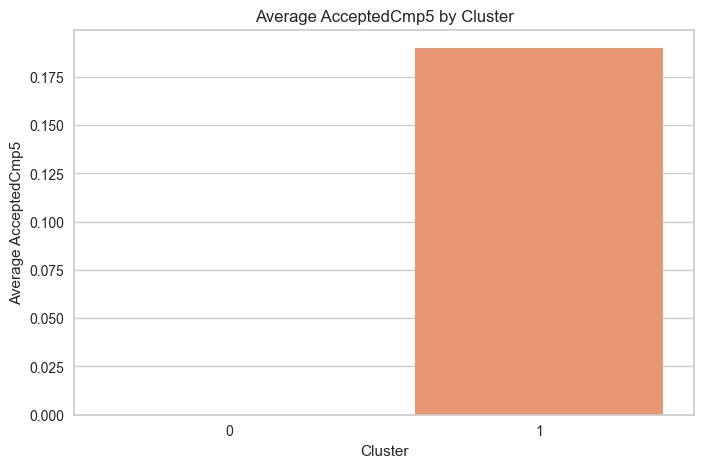

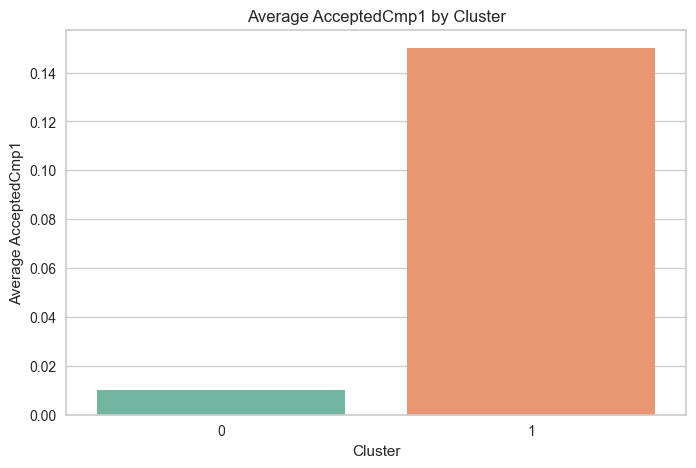

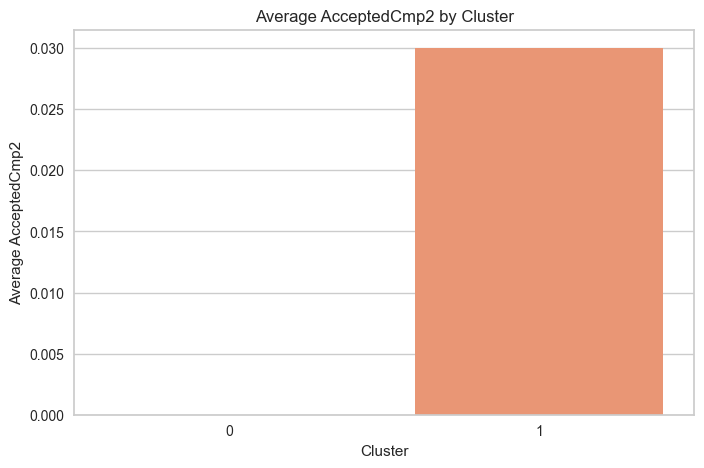

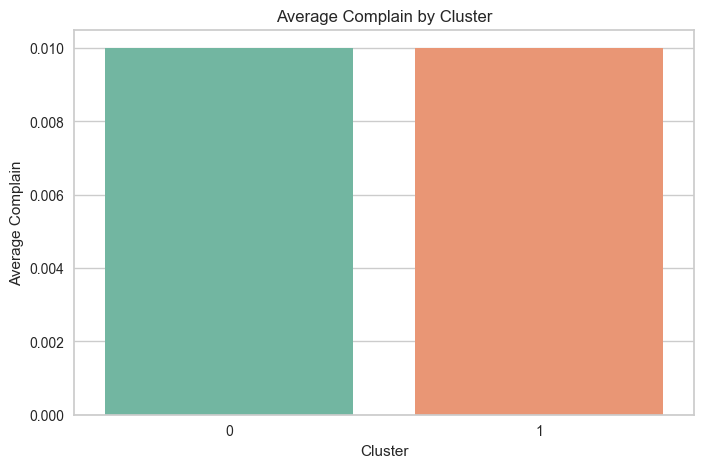

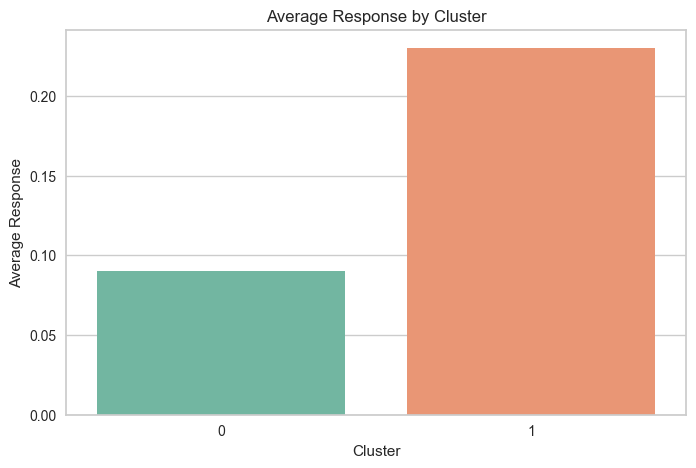

In [93]:
# Find the mean for each item in the numerical data in each cluster
cluster_profile = data.groupby('Cluster')[list(num_data)].mean().round(2)

# Plot each average value in a bar plot, grouped by cluster
for col in num_data:
    plt.figure(figsize=(8,5))
    sns.barplot(x=cluster_profile.index, y=cluster_profile[col], palette="Set2")
    plt.title(f'Average {col} by Cluster')
    plt.xlabel("Cluster")
    plt.ylabel(f"Average {col}")
    plt.show()

##### **Observations:** Cluster 1 has a significantly less average income compared to cluster 2, and on average more children in the house. For all purchases Cluster 1 has much much less purchased on average as opposed to cluster 2, and also had much more average number of purchases with deals. Cluster 2 had more web, catalog and store purchases, but interstingly cluster 1 had more website visits. Cluster 2 seemed to be overall much more responsive to all the campaigns.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

There seems to be two main groups based on the cluster profiling. One group are the budget-conscious families and the others are the high-income professionals who may or may not have families to take care of. 

Budget-Conscious Families (Cluster 1):
This group represents households with modest income levels and lower overall spending habits. Their purchasing behavior reflects careful financial management, prioritizing value and necessity over luxury. For this cluster, businesses should emphasize affordability and practicality—offering bundled family deals, discounts on essential goods, and loyalty programs that reward consistent, cost-sensitive shopping. Marketing efforts should highlight savings, durability, and reliability, delivered through channels that resonate with family decision-makers.

High-Income Professionals (Cluster 2):
In contrast, this cluster consists of higher-income individuals who exhibit lower-than-expected spending relative to their means. These customers have strong purchasing power but may require the right incentives to convert their income into higher-value purchases. Business strategy here should focus on exclusivity, premium experiences, and personalized offers. By presenting aspirational products, tailored services, and VIP-style perks, companies can encourage this cluster to increase their engagement. The key is to move beyond price-based messaging and instead appeal to their desire for quality, status, and convenience.